In [1]:
## Import required basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

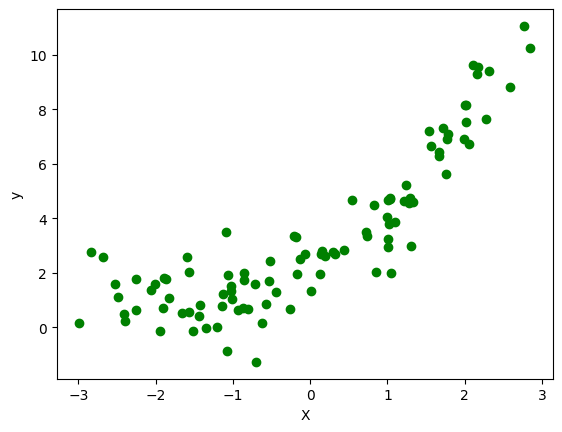

In [3]:
## Create Dataset
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# Quadratic Equation Used: 0.5x^2 + 1.5x + 2 + outliers
plt.scatter(X, y, color = 'g')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
## Implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()

In [6]:
regression1.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression1.predict(X_test))
print(f"R-squared: {score}")

R-squared: 0.788365165010817


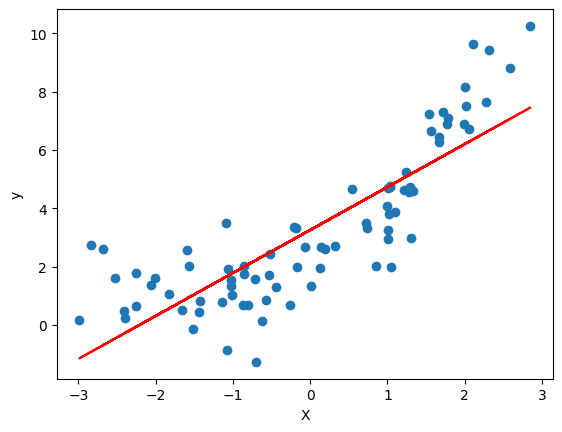

In [8]:
## Visualize the Linear Regression Model
plt.plot(X_train, regression1.predict(X_train), color = 'r')
plt.scatter(X_train, y_train)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [9]:
## Apply Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
regression2 = LinearRegression()
regression2.fit(X_train_poly, y_train)
y_pred = regression2.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(f"R-squared: {score}")

R-squared: 0.9463763332743322


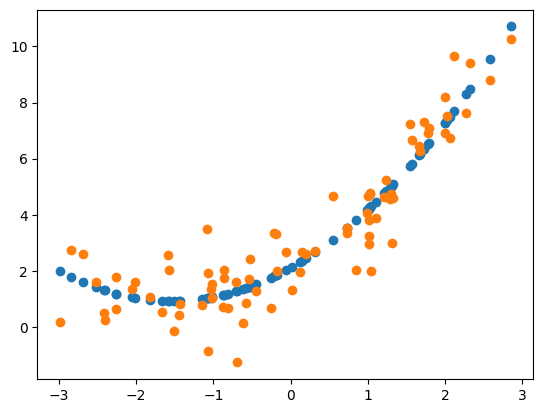

In [14]:
plt.scatter(X_train, regression2.predict(X_train_poly))
plt.scatter(X_train , y_train)
plt.show()

In [15]:
## Predict new data
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

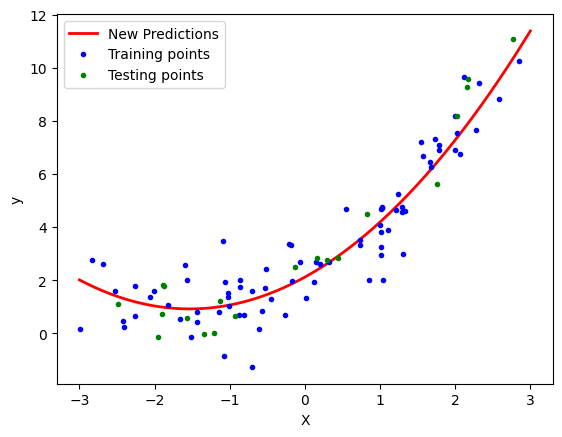

In [17]:
y_new = regression2.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label='New Predictions')
plt.plot(X_train, y_train, 'b.', label='Training points')
plt.plot(X_test, y_test, 'g.', label='Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [18]:
## Implementing Polynomial Regression using Pipelines
from sklearn.pipeline import Pipeline

In [19]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

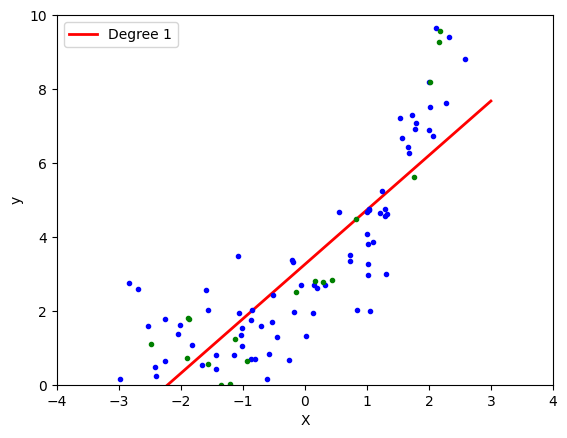

In [20]:
poly_regression(1)

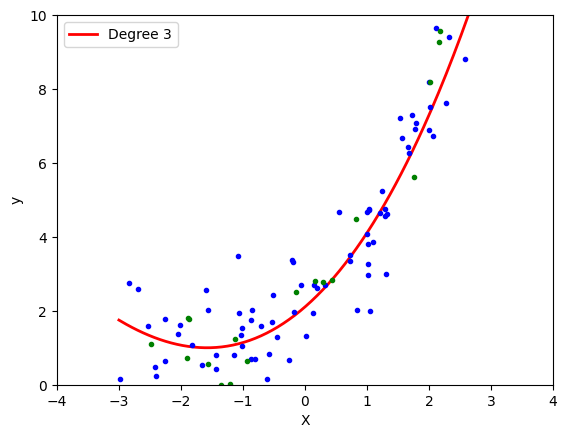

In [21]:
poly_regression(3)

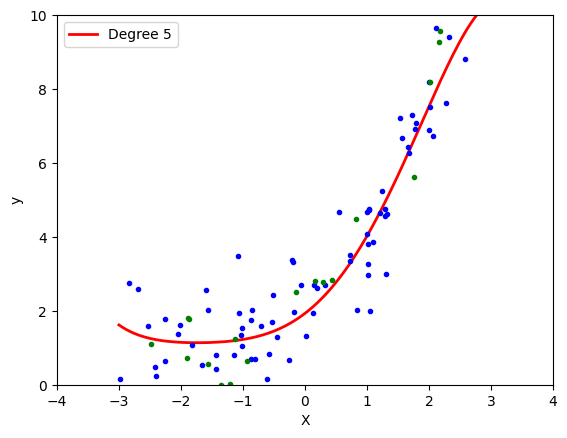

In [23]:
poly_regression(5)